In [1]:
import mat73
import pandas as pd
import numpy as np
import scipy.io
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os

DATA_DIR = ''
if 'google.colab' not in str(get_ipython()) and "anuja" in os.environ.get('USER'):
    DATA_DIR = 'data/'
    

## Sensor Level

In [3]:
foof = pd.read_csv(DATA_DIR+"/sensor_intercept_slope.csv")
columns = [['Electrode %d - Intercept'%(i), 'Electrode %d - Slope'%(i)] for i in range(1, 106)]
columns = list(np.array(columns).flatten())
columns.append('IDs')
foof.columns = columns
foof

,Electrode 1 - Intercept,Electrode 1 - Slope,Electrode 2 - Intercept,Electrode 2 - Slope,Electrode 3 - Intercept,Electrode 3 - Slope,Electrode 4 - Intercept,Electrode 4 - Slope,Electrode 5 - Intercept,Electrode 5 - Slope,...,Electrode 101 - Slope,Electrode 102 - Intercept,Electrode 102 - Slope,Electrode 103 - Intercept,Electrode 103 - Slope,Electrode 104 - Intercept,Electrode 104 - Slope,Electrode 105 - Intercept,Electrode 105 - Slope,IDs
0,1.610769,1.793923,1.639958,1.803579,1.622763,1.867163,1.596286,1.868653,1.459489,1.880624,...,1.637747,1.472414,1.775967,1.534612,1.803604,1.575800,1.869977,0.986272,1.825774,NDARAA075AMK
1,1.572269,1.762184,1.615888,1.938907,1.515331,1.878222,1.577389,1.888830,1.645799,1.892993,...,1.698141,1.698537,1.854421,1.486611,1.755794,1.517099,1.845983,1.486650,1.888544,NDARAA112DMH
2,1.414507,1.818785,1.504383,1.902537,1.563395,1.936381,1.554663,2.085351,1.566065,2.106747,...,1.847331,1.417519,1.869143,1.323095,1.838333,1.496008,1.895424,1.593155,2.095749,NDARAA117NEJ
3,0.561062,1.068994,0.333554,0.991180,0.555779,1.304169,0.665864,1.491464,0.524828,1.573271,...,1.464311,0.576556,1.265274,0.199181,0.863242,0.246682,1.010393,0.703331,1.724831,NDARAA947ZG5
4,1.262007,1.901401,1.305927,1.924721,1.293914,1.924840,1.226456,1.947274,0.818595,1.905113,...,1.859064,1.158560,1.863190,1.173287,1.773532,1.252168,1.878925,0.918020,1.749441,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,0.648706,1.508826,0.591809,1.640814,0.640782,1.665891,0.455759,1.679019,0.866016,1.786340,...,1.536850,0.528776,1.478037,0.466827,1.767683,0.570274,1.664126,1.351549,1.996940,NDARZN277NR6
2038,1.332278,1.729382,1.387863,1.788208,1.452167,1.841329,1.524229,1.976239,1.480653,2.022584,...,1.876485,1.214977,1.795080,1.456392,1.835807,1.399127,1.795906,1.380795,2.036327,NDARZN578YDP
2039,0.746123,1.324138,0.653335,1.285734,0.564490,1.271931,0.375903,1.245331,0.258508,1.206112,...,1.307891,0.691917,1.310004,0.604437,1.283587,0.564744,1.273098,0.339229,1.050644,NDARZN610GTY
2040,0.976055,1.441830,0.823197,1.407064,0.879368,1.464799,0.902699,1.512205,1.012450,1.505105,...,1.341166,0.598687,1.282644,0.697733,1.421177,0.753861,1.457204,0.781225,1.470061,NDARZN677EYE


In [4]:
data = scipy.io.loadmat(DATA_DIR+'x.mat')  
df = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))

# sparsing
# df = np.array(df).reshape(data['x'].shape)
# df_sparsed = np.concatenate([np.expand_dims(df[:,:,i:i+2].mean(axis = 2), axis = 2) for i in range(0, data['x'].shape[2]-2, 2)], axis = 2)
# df = pd.DataFrame(df_sparsed.reshape((df_sparsed.shape[0], -1)))
# print(df_sparsed.shape)

#scaling
# norm = MinMaxScaler().fit(df)
# df = norm.transform(df)
# df = pd.DataFrame(df.reshape((df.shape[0], -1)))

columns = np.asarray([['Electrode %d - %.1f Hz'%(i+1, j)] for i in range(105) for j in np.arange(1, 40.5, 0.5)])
df.columns = columns
df['IDs'] = foof['IDs']
df

,"(Electrode 1 - 1.0 Hz,)","(Electrode 1 - 1.5 Hz,)","(Electrode 1 - 2.0 Hz,)","(Electrode 1 - 2.5 Hz,)","(Electrode 1 - 3.0 Hz,)","(Electrode 1 - 3.5 Hz,)","(Electrode 1 - 4.0 Hz,)","(Electrode 1 - 4.5 Hz,)","(Electrode 1 - 5.0 Hz,)","(Electrode 1 - 5.5 Hz,)",...,"(Electrode 105 - 36.0 Hz,)","(Electrode 105 - 36.5 Hz,)","(Electrode 105 - 37.0 Hz,)","(Electrode 105 - 37.5 Hz,)","(Electrode 105 - 38.0 Hz,)","(Electrode 105 - 38.5 Hz,)","(Electrode 105 - 39.0 Hz,)","(Electrode 105 - 39.5 Hz,)","(Electrode 105 - 40.0 Hz,)",IDs
0,7.707834e-12,1.512286e-10,2.475735e-09,3.453763e-08,4.554996e-07,0.000007,0.000109,0.001314,0.009992,0.045200,...,2.990881e-09,1.223086e-09,4.893694e-10,1.915752e-10,7.337775e-11,2.749867e-11,1.008282e-11,3.617107e-12,1.269651e-12,NDARAA075AMK
1,3.798713e-02,1.639433e-01,2.897591e-01,2.097609e-01,6.347556e-02,0.027758,0.105298,0.184513,0.130638,0.163258,...,5.835291e-06,1.856717e-06,5.922864e-07,1.928109e-07,6.449918e-08,2.204650e-08,7.598678e-09,2.604260e-09,8.780452e-10,NDARAA112DMH
2,2.104310e-06,4.299647e-05,5.644195e-04,4.760137e-03,2.579253e-02,0.089799,0.201005,0.290260,0.276177,0.196151,...,1.332064e-07,5.270957e-08,2.026971e-08,7.575282e-09,2.751336e-09,9.711398e-10,3.331297e-10,1.110552e-10,3.597966e-11,NDARAA117NEJ
3,1.692639e-01,2.021357e-01,2.273063e-01,2.406964e-01,2.400039e-01,0.225430,0.202278,0.198154,0.228356,0.181836,...,8.323825e-02,7.759521e-02,7.183415e-02,6.604061e-02,6.029416e-02,5.466678e-02,4.922161e-02,4.401211e-02,3.908162e-02,NDARAA947ZG5
4,8.332328e-06,1.552379e-04,1.804338e-03,1.287033e-02,5.615280e-02,0.149809,0.244887,0.247738,0.163687,0.094061,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,8.241315e-06,2.938160e-04,4.641777e-03,3.249546e-02,1.008094e-01,0.138615,0.084707,0.024339,0.009157,0.021386,...,5.852474e-03,4.262113e-03,3.068545e-03,2.184048e-03,1.536788e-03,1.069025e-03,7.351630e-04,4.998062e-04,3.359246e-04,NDARZN277NR6
2038,8.113400e-03,1.005675e-02,1.237930e-02,1.513279e-02,1.837070e-02,0.022147,0.026515,0.031525,0.037230,0.043721,...,5.855173e-04,3.933072e-04,2.601868e-04,1.695084e-04,1.087534e-04,6.871244e-05,4.275280e-05,2.619553e-05,1.580597e-05,NDARZN578YDP
2039,5.472767e-03,8.816325e-03,1.629356e-02,3.226822e-02,6.212373e-02,0.108594,0.166461,0.220594,0.252412,0.252807,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NDARZN610GTY
2040,2.658455e-03,5.749806e-03,1.180538e-02,2.300961e-02,4.257369e-02,0.074778,0.124685,0.197358,0.296551,0.423009,...,3.676327e-04,1.925477e-04,9.805386e-05,4.855040e-05,2.337344e-05,1.094093e-05,4.979521e-06,2.203549e-06,9.481114e-07,NDARZN677EYE


In [5]:
# import matplotlib.pyplot as plt

# plt.plot(np.array(df)[0][79:79+79])
# plt.title('from reshaped data frame')
# plt.show()


# plt.plot(data['x'][0][1])
# plt.title('from x.mat')
# plt.show()


# import pandas
# path = os.path.join(DATA_DIR, 'split_data_csv')
# sensor = pandas.read_csv(os.path.join(path, 'train_features_sensor.csv'))
# plt.plot(np.array(sensor[sensor.IDs.isin(['NDARAA075AMK'])])[0][79:79+79])
# plt.title('from sensor features csv')
# plt.show()

# df.to_csv('X_sensor_noscaling.csv', sep='\t')

In [6]:
beh = pd.read_csv(DATA_DIR+"behaviorals.csv")
print('Before:'+str(beh.shape))

most_common_disorders = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders',  'No Diagnosis Given', 'Other Disorders']

category_columns = ['DX_' + str(i).zfill(2) + '_Cat' for i in range(1, 11)] +\
                   ['DX_' + str(i).zfill(2) + '_Sub' for i in range(1, 11)]

# removing patients with incomplete eval
initial_size = beh.shape[0]
beh = beh[beh.DX_01 != 'No Diagnosis Given: Incomplete Eval']
beh = beh.reset_index(drop=True)
new_size = beh.shape[0]

print('After:'+str(beh.shape))
print('Removing', initial_size - new_size,
      'patients as their evaluations was incomplete.')

Before:(3076, 177)
After:(2939, 177)
Removing 137 patients as their evaluations was incomplete.


In [7]:
no_diagnosis_given = 'No Diagnosis Given'
diagnoses_to_ids = {disorder: i for i, disorder in enumerate(most_common_disorders)}
diagnoses_to_ids

{'Attention-Deficit/Hyperactivity Disorder': 0,
 'Anxiety Disorders': 1,
 'Specific Learning Disorder': 2,
 'Autism Spectrum Disorder': 3,
 'Disruptive': 4,
 'Communication Disorder': 5,
 'Depressive Disorders': 6,
 'No Diagnosis Given': 7,
 'Other Disorders': 8}

In [8]:
def get_disorder(data, row, index):
    disorder = data.iloc[row][category_columns[index]]

    if disorder == 'Neurodevelopmental Disorders':
        disorder = data.iloc[row][category_columns[index + 10]]

    return disorder

order_of_disorders = []
for k in range(beh.shape[0]):
    i = 0
    disorder = get_disorder(beh, k, i)
    disorders_patient = []
    while not pd.isnull(disorder):
        if disorder in diagnoses_to_ids:
            if diagnoses_to_ids[disorder] not in disorders_patient:
                disorders_patient.append(diagnoses_to_ids[disorder])
        else:
            if diagnoses_to_ids['Other Disorders'] not in disorders_patient:
                disorders_patient.append(diagnoses_to_ids['Other Disorders'])
        i += 1
        if i == len(category_columns):
            break
        disorder = get_disorder(beh, k, i)

        
    order_of_disorders.append(disorders_patient)

In [9]:
other_disorders = []
no_diagnosis_given = []
for i in order_of_disorders:
    if 7 in i:
        no_diagnosis_given.append(1)
        i.remove(7)
    else:
        no_diagnosis_given.append(0)
    if 8 in i:
        other_disorders.append(1)
        i.remove(8)
    else:
        other_disorders.append(0)

In [10]:
max_len_order = np.max([len(x) for x in order_of_disorders])

# pad with a new token denoting the pad token
pad_token = len(most_common_disorders)
bod_token = len(most_common_disorders) + 1
eod_token = len(most_common_disorders) + 2

order_of_disorders = [[bod_token] + x + [eod_token] + [pad_token] * (max_len_order - len(x)) for x in order_of_disorders]

order_of_disorders = np.array(order_of_disorders)

classes = np.zeros((len(most_common_disorders),
                    beh.shape[0]), dtype=np.int32)

df_disorders = beh[category_columns]

for i, disorder in enumerate(most_common_disorders):
    mask = df_disorders.select_dtypes(include=[object]). \
        applymap(lambda x: disorder in x if pd.notnull(x) else False)

    disorder_df = df_disorders[mask.any(axis=1)]

    np.add.at(classes[i], disorder_df.index.values, 1)

behaviour_data_columns = beh.columns.values.astype(np.str)

columns_to_drop = behaviour_data_columns[
    np.flatnonzero(np.core.defchararray.find(behaviour_data_columns, 'DX') != -1)]

behaviour_data = beh.drop(columns=columns_to_drop)

for disorder, classification in zip(most_common_disorders, classes):
    behaviour_data[disorder] = classification

behaviour_data['order_diagnoses'] = list(order_of_disorders)

<ipython-input-10-48b714085ca7>:25: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  behaviour_data_columns = beh.columns.values.astype(np.str)


In [11]:
common_disorders = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders']

labels=behaviour_data[["IDs"]+list(common_disorders)]
labels["Other Disorders"] = other_disorders
labels

<ipython-input-11-26c912096f42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Other Disorders"] = other_disorders


,IDs,Attention-Deficit/Hyperactivity Disorder,Anxiety Disorders,Specific Learning Disorder,Autism Spectrum Disorder,Disruptive,Communication Disorder,Depressive Disorders,Other Disorders
0,NDARAA075AMK,0,0,0,0,0,0,0,0
1,NDARAA112DMH,1,0,0,0,1,0,0,1
2,NDARAA117NEJ,1,0,0,0,1,0,0,1
3,NDARAA306NT2,1,1,1,0,0,1,0,1
4,NDARAA504CRN,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2934,NDARZZ007YMP,0,0,0,1,0,0,0,1
2935,NDARZZ740MLM,1,0,0,0,0,0,0,0
2936,NDARZZ810LVF,0,0,0,1,0,1,0,1
2937,NDARZZ830JM7,0,0,0,1,0,0,0,1


In [12]:
add_features = behaviour_data[['Sex', 'Age','IDs']]
add_features.shape

(2939, 3)

In [13]:
df = pd.merge(df, foof, on='IDs', how='inner')
df = pd.merge(df, labels, on='IDs', how='inner')
df = pd.merge(df, add_features, on='IDs', how='inner')
df

,"(Electrode 1 - 1.0 Hz,)","(Electrode 1 - 1.5 Hz,)","(Electrode 1 - 2.0 Hz,)","(Electrode 1 - 2.5 Hz,)","(Electrode 1 - 3.0 Hz,)","(Electrode 1 - 3.5 Hz,)","(Electrode 1 - 4.0 Hz,)","(Electrode 1 - 4.5 Hz,)","(Electrode 1 - 5.0 Hz,)","(Electrode 1 - 5.5 Hz,)",...,Attention-Deficit/Hyperactivity Disorder,Anxiety Disorders,Specific Learning Disorder,Autism Spectrum Disorder,Disruptive,Communication Disorder,Depressive Disorders,Other Disorders,Sex,Age
0,7.707834e-12,1.512286e-10,2.475735e-09,3.453763e-08,4.554996e-07,0.000007,0.000109,0.001314,0.009992,0.045200,...,0,0,0,0,0,0,0,0,1,6.728040
1,3.798713e-02,1.639433e-01,2.897591e-01,2.097609e-01,6.347556e-02,0.027758,0.105298,0.184513,0.130638,0.163258,...,1,0,0,0,1,0,0,1,0,5.545744
2,2.104310e-06,4.299647e-05,5.644195e-04,4.760137e-03,2.579253e-02,0.089799,0.201005,0.290260,0.276177,0.196151,...,1,0,0,0,1,0,0,1,0,7.475929
3,1.692639e-01,2.021357e-01,2.273063e-01,2.406964e-01,2.400039e-01,0.225430,0.202278,0.198154,0.228356,0.181836,...,1,0,1,1,0,0,0,1,0,13.627880
4,8.332328e-06,1.552379e-04,1.804338e-03,1.287033e-02,5.615280e-02,0.149809,0.244887,0.247738,0.163687,0.094061,...,1,0,0,0,0,0,0,1,1,7.982660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,3.397339e-06,1.701445e-05,7.576350e-05,2.999317e-04,1.055570e-03,0.003303,0.009185,0.022711,0.049919,0.097542,...,0,1,0,0,0,0,0,0,1,11.629363
1917,8.241315e-06,2.938160e-04,4.641777e-03,3.249546e-02,1.008094e-01,0.138615,0.084707,0.024339,0.009157,0.021386,...,1,1,0,0,0,0,1,0,1,14.878736
1918,5.472767e-03,8.816325e-03,1.629356e-02,3.226822e-02,6.212373e-02,0.108594,0.166461,0.220594,0.252412,0.252807,...,0,0,0,0,0,0,0,1,1,16.379534
1919,2.658455e-03,5.749806e-03,1.180538e-02,2.300961e-02,4.257369e-02,0.074778,0.124685,0.197358,0.296551,0.423009,...,1,0,0,0,0,0,0,0,1,15.029545


In [14]:
behaviour_data_reg = pd.read_csv(DATA_DIR+'AllData.csv')
behaviour_data_reg_ = behaviour_data_reg.rename(columns = {'EID': 'IDs'}, inplace = True)
behaviour_data_reg.columns

Index(['IDs', 'SRS_SCI_T', 'SRS_RRB_T', 'SWAN_IN_Avg', 'SWAN_HY_Avg',
       'SWAN_Avg', 'SCARED_SR_GD', 'SCARED_P_GD', 'WISC_WMI_Sum',
       'WISC_VCI_Sum'],
      dtype='object')

In [15]:
behaviour_data_reg = behaviour_data_reg[['IDs', 'SRS_SCI_T', 'SRS_RRB_T', 'SWAN_IN_Avg', 'SWAN_HY_Avg',
       'SWAN_Avg', 'SCARED_P_GD', 'WISC_WMI_Sum',
       'WISC_VCI_Sum']]
behaviour_data_reg.shape

(2579, 9)

In [16]:
df = pd.merge(df, behaviour_data_reg, on='IDs', how='left')
df.shape


(1921, 8524)

In [17]:
disorders_list = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders', 'Other Disorders']

labels_list = [ 'SRS_SCI_T', 'SRS_RRB_T', 'SWAN_IN_Avg', 'SWAN_HY_Avg', 'SCARED_P_GD', 'WISC_WMI_Sum', 'WISC_VCI_Sum']

x_sensor = pd.DataFrame.copy(df)
x_sensor = x_sensor.drop(disorders_list+labels_list+['SWAN_Avg'], axis=1)

y = df[disorders_list+labels_list]
y["IDs"] = x_sensor["IDs"] #adding IDs for split

print(x_sensor.shape, y.shape)


(1921, 8508) (1921, 16)


<ipython-input-17-d8d537e25934>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["IDs"] = x_sensor["IDs"] #adding IDs for split


## Source Level

In [18]:
# ## data loading
# data_source = mat73.loadmat(DATA_DIR+'x_source_new.mat')  
foof_source = pd.read_csv(DATA_DIR+"source_intercept_slope.csv")
foof_source = foof_source.drop('Unnamed: 0', 1)
columns = [['Parcel %d - Intercept'%(i), 'Parcel %d - Slope'%(i)] for i in range(1, 69)]
columns = list(np.array(columns).flatten())
columns.append('IDs')
foof_source.columns = columns

In [19]:
pd.read_csv('params_source.csv')

,p_1_intercept,p_1_slope,p_2_intercept,p_2_slope,p_3_intercept,p_3_slope,p_4_intercept,p_4_slope,p_5_intercept,p_5_slope,...,p_64_intercept,p_64_slope,p_65_intercept,p_65_slope,p_66_intercept,p_66_slope,p_67_intercept,p_67_slope,p_68_intercept,p_68_slope
0,0.160123,1.362617,-0.002037,1.427172,0.810964,1.391837,0.745124,1.378194,0.527491,1.433532,...,-0.097145,1.519565,1.004265,1.450747,0.956578,1.456952,0.611944,1.503932,0.282555,1.441946
1,0.988915,1.330636,1.151667,1.546990,1.479442,1.608810,1.342563,1.559859,0.460923,1.434832,...,1.149346,1.461904,1.449481,1.480738,0.889122,1.282076,0.950479,1.138697,1.372408,1.505823
2,1.455004,1.515717,0.988018,1.367703,2.029333,1.763131,2.086803,1.763987,1.320758,1.585413,...,1.130052,1.502295,1.596192,1.448922,1.180667,1.199036,1.658822,1.619147,1.182087,1.395998
3,0.796931,1.547997,0.016022,0.956344,0.638462,1.222323,0.698921,1.395078,-0.130122,1.156477,...,-0.241526,0.998001,0.079507,1.285272,0.471817,1.175649,0.617125,1.418717,0.401675,1.222953
4,-0.627481,1.123518,-0.255195,1.273727,0.197328,1.344738,0.282533,1.387126,-0.808075,1.077384,...,0.001076,1.363285,0.049249,1.207528,-0.118998,1.296786,-0.253839,1.176320,-0.033039,1.318181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,-0.561398,1.060676,-0.680878,1.241504,0.177737,1.110332,0.141657,1.116719,-0.347975,1.110417,...,-0.934720,1.153422,0.182297,1.016177,0.177069,1.042335,-0.124226,1.165734,-0.418218,1.085482
2038,1.178082,1.344137,1.127791,1.414553,1.802019,1.642233,1.680568,1.593067,0.891970,1.502417,...,1.305561,1.576864,2.119400,1.755767,1.780714,1.576273,1.551271,1.384801,1.587596,1.466845
2039,-0.394953,1.348060,-0.918028,1.088161,-0.134448,1.122479,-0.268877,1.111450,-0.288241,1.206044,...,-0.891403,1.099186,-0.022279,1.275160,-0.316072,1.201135,-0.249886,1.300831,-0.656477,1.232983
2040,-0.347506,0.870524,0.144745,1.257984,0.636052,0.952351,0.745472,0.988167,-0.353721,0.937682,...,0.254825,1.278362,0.544927,0.883756,0.788643,1.038478,-0.372208,0.747925,0.414824,1.251458


In [20]:
foof_source

,Parcel 1 - Intercept,Parcel 1 - Slope,Parcel 2 - Intercept,Parcel 2 - Slope,Parcel 3 - Intercept,Parcel 3 - Slope,Parcel 4 - Intercept,Parcel 4 - Slope,Parcel 5 - Intercept,Parcel 5 - Slope,...,Parcel 64 - Slope,Parcel 65 - Intercept,Parcel 65 - Slope,Parcel 66 - Intercept,Parcel 66 - Slope,Parcel 67 - Intercept,Parcel 67 - Slope,Parcel 68 - Intercept,Parcel 68 - Slope,IDs
0,0.160123,1.362617,-0.002037,1.427172,0.810964,1.391837,0.745124,1.378194,0.527491,1.433532,...,1.519565,1.004265,1.450747,0.956578,1.456952,0.611944,1.503932,0.282555,1.441946,NDARAA075AMK
1,0.988915,1.330636,1.151667,1.546990,1.479442,1.608810,1.342563,1.559859,0.460923,1.434832,...,1.461904,1.449481,1.480738,0.889122,1.282076,0.950479,1.138697,1.372408,1.505823,NDARAA112DMH
2,1.455004,1.515717,0.988018,1.367703,2.029333,1.763131,2.086803,1.763987,1.320758,1.585413,...,1.502295,1.596192,1.448922,1.180667,1.199036,1.658822,1.619147,1.182087,1.395998,NDARAA117NEJ
3,0.796931,1.547997,0.016022,0.956344,0.638462,1.222323,0.698921,1.395078,-0.130122,1.156477,...,0.998001,0.079507,1.285272,0.471817,1.175649,0.617125,1.418717,0.401675,1.222953,NDARAA947ZG5
4,-0.627481,1.123518,-0.255195,1.273727,0.197328,1.344738,0.282533,1.387126,-0.808075,1.077384,...,1.363285,0.049249,1.207528,-0.118998,1.296786,-0.253839,1.176320,-0.033039,1.318181,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,-0.561398,1.060676,-0.680878,1.241504,0.177737,1.110332,0.141657,1.116719,-0.347975,1.110417,...,1.153422,0.182297,1.016177,0.177069,1.042335,-0.124226,1.165734,-0.418218,1.085482,NDARZN277NR6
2038,1.178082,1.344137,1.127791,1.414553,1.802019,1.642233,1.680568,1.593067,0.891970,1.502417,...,1.576864,2.119400,1.755767,1.780714,1.576273,1.551271,1.384801,1.587596,1.466845,NDARZN578YDP
2039,-0.394953,1.348060,-0.918028,1.088161,-0.134448,1.122479,-0.268877,1.111450,-0.288241,1.206044,...,1.099186,-0.022279,1.275160,-0.316072,1.201135,-0.249886,1.300831,-0.656477,1.232983,NDARZN610GTY
2040,-0.347506,0.870524,0.144745,1.257984,0.636052,0.952351,0.745472,0.988167,-0.353721,0.937682,...,1.278362,0.544927,0.883756,0.788643,1.038478,-0.372208,0.747925,0.414824,1.251458,NDARZN677EYE


In [21]:
data = mat73.loadmat(DATA_DIR+'x_source_new.mat')  
df2 = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))

# sparsing
# df2 = np.array(df2).reshape(data['x'].shape) 
# df2_sparsed = np.concatenate([np.expand_dims(df2[:,:,i:i+2].mean(axis = 2), axis = 2) for i in range(0, data['x'].shape[2]-2, 2)], axis = 2)
# df2 = pd.DataFrame(df2_sparsed.reshape((df2_sparsed.shape[0], -1)))

#scaling
# norm = MinMaxScaler().fit(df2)
# df2 = norm.transform(df2)
# df2 = pd.DataFrame(df2.reshape((df2.shape[0], -1)))

columns = np.asarray([['Parcel %d - %.1f Hz'%(i+1, j)] for i in range(68) for j in np.arange(1, 40.5, 0.5)])
df2.columns = columns
df2['IDs'] = foof['IDs']

df_source = pd.DataFrame.copy(df2)
df_source

,"(Parcel 1 - 1.0 Hz,)","(Parcel 1 - 1.5 Hz,)","(Parcel 1 - 2.0 Hz,)","(Parcel 1 - 2.5 Hz,)","(Parcel 1 - 3.0 Hz,)","(Parcel 1 - 3.5 Hz,)","(Parcel 1 - 4.0 Hz,)","(Parcel 1 - 4.5 Hz,)","(Parcel 1 - 5.0 Hz,)","(Parcel 1 - 5.5 Hz,)",...,"(Parcel 68 - 36.0 Hz,)","(Parcel 68 - 36.5 Hz,)","(Parcel 68 - 37.0 Hz,)","(Parcel 68 - 37.5 Hz,)","(Parcel 68 - 38.0 Hz,)","(Parcel 68 - 38.5 Hz,)","(Parcel 68 - 39.0 Hz,)","(Parcel 68 - 39.5 Hz,)","(Parcel 68 - 40.0 Hz,)",IDs
0,2.852107e-12,6.843959e-11,1.334486e-09,2.114389e-08,2.722198e-07,2.847860e-06,2.420928e-05,1.672280e-04,9.386428e-04,4.281104e-03,...,4.083400e-13,1.199041e-14,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NDARAA075AMK
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.422859e-02,1.792809e-01,2.261597e-01,1.471350e-01,4.932961e-02,8.522938e-03,7.588586e-04,3.481949e-05,8.233298e-07,NDARAA112DMH
2,1.873727e-04,3.700203e-02,1.338341e-01,8.866054e-03,1.075761e-05,2.390714e-10,1.143530e-13,4.469758e-12,1.420740e-10,4.289156e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NDARAA117NEJ
3,4.679133e-03,2.858350e-02,1.446466e-01,3.296430e-01,3.146601e-01,1.356668e-01,1.148714e-01,3.878903e-01,4.688989e-01,1.760009e-01,...,4.721801e-02,2.446504e-02,6.717445e-02,1.737527e-01,2.703009e-01,2.480023e-01,1.340995e-01,4.273146e-02,8.024469e-03,NDARAA947ZG5
4,1.426186e-01,1.919957e-01,2.337057e-01,2.572226e-01,2.559831e-01,2.303433e-01,1.874140e-01,1.378767e-01,9.171530e-02,5.516572e-02,...,5.047329e-02,4.878144e-02,5.355981e-02,1.013861e-01,5.092052e-02,3.967086e-02,3.699821e-02,3.428801e-02,3.155638e-02,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,1.641564e-04,5.061825e-03,4.748293e-02,1.355030e-01,1.176366e-01,3.107015e-02,2.513731e-03,1.849108e-04,7.014072e-04,3.183943e-03,...,3.161835e-08,1.106568e-08,3.738061e-09,1.218730e-09,3.834910e-10,1.164628e-10,3.413536e-11,9.656276e-12,2.636114e-12,NDARZN277NR6
2038,1.273725e-07,2.854585e-06,4.301847e-05,4.342317e-04,2.934193e-03,1.327155e-02,4.019215e-02,8.169716e-02,1.133810e-01,1.182013e-01,...,6.180279e-12,1.819545e-12,5.200285e-13,1.443290e-13,3.885781e-14,1.021405e-14,2.553513e-15,6.661338e-16,1.110223e-16,NDARZN578YDP
2039,0.000000e+00,7.771561e-16,3.630429e-14,1.391887e-12,4.209189e-11,1.004152e-09,1.889601e-08,2.804845e-07,3.284092e-06,3.033118e-05,...,1.329739e-01,1.350156e-01,1.346921e-01,1.320204e-01,1.271395e-01,1.202986e-01,1.118360e-01,1.021511e-01,9.167378e-02,NDARZN610GTY
2040,1.363800e-08,1.521235e-07,1.428039e-06,1.127810e-05,7.492867e-05,4.187613e-04,1.968741e-03,7.785975e-03,2.590237e-02,7.248831e-02,...,5.546025e-07,2.166196e-07,8.182735e-08,2.989401e-08,1.056221e-08,3.609193e-09,1.192753e-09,3.812199e-10,1.178382e-10,NDARZN677EYE


In [22]:
x_source = pd.merge(df_source, foof_source, on='IDs', how='inner')
x_source = pd.merge(x_source, add_features, on='IDs', how='inner')
x_source.shape

(1921, 5511)

In [23]:
# a = np.array(xsourcesplit[xsourcesplit.columns[:79]])
# avg = np.average(a, axis=0)
# plt.plot(avg)
# plt.title('from xsource')
# plt.show()


# a = np.array(source[source.columns[:79]])
# avg = np.average(a, axis=0)
# plt.plot(avg)
# plt.title('from xsource csv')
# plt.show()

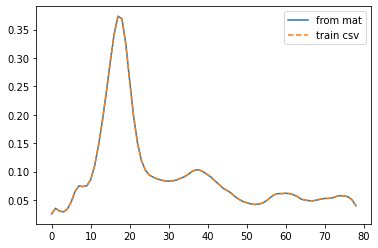

In [38]:
import matplotlib.pyplot as plt
data = mat73.loadmat(DATA_DIR+'x_source_new.mat')  
df2 = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))
df2['IDs'] = foof['IDs']

a = pd.read_csv('data/split_data_csv/train_features_source.csv')

# plt.plot(np.average(np.array(df2[df2.IDs.isin(a.IDs)])[:,:68*79][:,38::79], axis=0), label='from mat')
# plt.plot(np.average(np.array(a)[:, :68*79][:, 38::79], axis=0), '--', label='train csv',)
plt.plot(np.average(np.array(df2[df2.IDs.isin(a.IDs)])[:,:68*79][:,:79], axis=0), label='from mat')
plt.plot(np.average(np.array(a)[:, :68*79][:, :79], axis=0), '--', label='train csv',)
plt.legend()
# sensor[sensor.IDs.isin(['NDARAA075AMK'])])[
# a.IDs
# 
# a.columns[:(68*79)]

In [25]:
# a = pd.read_csv('data/split_data_csv/train_features_source.csv')
# plt.plot(np.array(a)[0][79:79*2], label='csv')
# plt.plot(np.array(df2)[0][79:79*2], label='mat')
# plt.legend()

In [26]:
data = mat73.loadmat(DATA_DIR+'x_source_new.mat')  
df2 = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))
df2

,0,1,2,3,4,5,6,7,8,9,...,5362,5363,5364,5365,5366,5367,5368,5369,5370,5371
0,2.852107e-12,6.843959e-11,1.334486e-09,2.114389e-08,2.722198e-07,2.847860e-06,2.420928e-05,1.672280e-04,9.386428e-04,4.281104e-03,...,1.113487e-11,4.083400e-13,1.199041e-14,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.621840e-01,8.422859e-02,1.792809e-01,2.261597e-01,1.471350e-01,4.932961e-02,8.522938e-03,7.588586e-04,3.481949e-05,8.233298e-07
2,1.873727e-04,3.700203e-02,1.338341e-01,8.866054e-03,1.075761e-05,2.390714e-10,1.143530e-13,4.469758e-12,1.420740e-10,4.289156e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,4.679133e-03,2.858350e-02,1.446466e-01,3.296430e-01,3.146601e-01,1.356668e-01,1.148714e-01,3.878903e-01,4.688989e-01,1.760009e-01,...,1.444433e-01,4.721801e-02,2.446504e-02,6.717445e-02,1.737527e-01,2.703009e-01,2.480023e-01,1.340995e-01,4.273146e-02,8.024469e-03
4,1.426186e-01,1.919957e-01,2.337057e-01,2.572226e-01,2.559831e-01,2.303433e-01,1.874140e-01,1.378767e-01,9.171530e-02,5.516572e-02,...,5.187803e-02,5.047329e-02,4.878144e-02,5.355981e-02,1.013861e-01,5.092052e-02,3.967086e-02,3.699821e-02,3.428801e-02,3.155638e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,1.641564e-04,5.061825e-03,4.748293e-02,1.355030e-01,1.176366e-01,3.107015e-02,2.513731e-03,1.849108e-04,7.014072e-04,3.183943e-03,...,8.723872e-08,3.161835e-08,1.106568e-08,3.738061e-09,1.218730e-09,3.834910e-10,1.164628e-10,3.413536e-11,9.656276e-12,2.636114e-12
2038,1.273725e-07,2.854585e-06,4.301847e-05,4.342317e-04,2.934193e-03,1.327155e-02,4.019215e-02,8.169716e-02,1.133810e-01,1.182013e-01,...,2.037914e-11,6.180279e-12,1.819545e-12,5.200285e-13,1.443290e-13,3.885781e-14,1.021405e-14,2.553513e-15,6.661338e-16,1.110223e-16
2039,0.000000e+00,7.771561e-16,3.630429e-14,1.391887e-12,4.209189e-11,1.004152e-09,1.889601e-08,2.804845e-07,3.284092e-06,3.033118e-05,...,1.286737e-01,1.329739e-01,1.350156e-01,1.346921e-01,1.320204e-01,1.271395e-01,1.202986e-01,1.118360e-01,1.021511e-01,9.167378e-02
2040,1.363800e-08,1.521235e-07,1.428039e-06,1.127810e-05,7.492867e-05,4.187613e-04,1.968741e-03,7.785975e-03,2.590237e-02,7.248831e-02,...,1.373254e-06,5.546025e-07,2.166196e-07,8.182735e-08,2.989401e-08,1.056221e-08,3.609193e-09,1.192753e-09,3.812199e-10,1.178382e-10


## Split

In [27]:
train_features_sensor, test_features_sensor, train_labels, test_labels = train_test_split(x_sensor, y, test_size=0.25, shuffle=True)

In [28]:
train_features_source = x_source[x_source.IDs.isin(train_features_sensor.IDs)]
test_features_source = x_source[x_source.IDs.isin(test_features_sensor.IDs)]

In [29]:
# classfication
train_labels_classification = train_labels[disorders_list+["IDs"]]
test_labels_classification = test_labels[disorders_list+["IDs"]]

# regression
train_labels_regression = train_labels[labels_list+["IDs"]]
test_labels_regression = test_labels[labels_list+["IDs"]]
test_labels_regression = test_labels_regression.dropna()

In [30]:
# modify test feature set based on column drop
test_features_sensor_regression = test_features_sensor[test_features_sensor.IDs.isin(test_labels_regression.IDs)]
test_features_source_regression = test_features_source[test_features_source.IDs.isin(test_labels_regression.IDs)]

In [31]:
test_features_sensor_classification = pd.DataFrame.copy(test_features_sensor)
test_features_source_classification = pd.DataFrame.copy(test_features_source)

In [32]:
# sanity checks
assert sorted(test_features_source_classification.IDs) == sorted(test_features_sensor_classification.IDs)
assert sorted(test_features_source_regression.IDs) == sorted(test_features_sensor_regression.IDs)
assert sorted(train_features_source.IDs) == sorted(train_features_sensor.IDs)

In [33]:
# saving to csv (hacky fix)

path = os.path.join(DATA_DIR, 'split_data')

#saving
if not(os.path.exists(path)):
    os.mkdir(path)
train_features_source.to_pickle(os.path.join(path, 'train_features_source.pkl'))
test_features_source_classification.to_pickle(os.path.join(path, 'test_features_source_classification.pkl'))
train_features_sensor.to_pickle(os.path.join(path, 'train_features_sensor.pkl'))
test_features_sensor_classification.to_pickle(os.path.join(path, 'test_features_sensor_classification.pkl'))
train_labels_classification.to_pickle(os.path.join(path, 'train_labels_classification.pkl'))
test_labels_classification.to_pickle(os.path.join(path, 'test_labels_classification.pkl'))
test_features_source_regression.to_pickle(os.path.join(path, 'test_features_source_regression.pkl'))
test_features_sensor_regression.to_pickle(os.path.join(path, 'test_features_sensor_regression.pkl'))
train_labels_regression.to_pickle(os.path.join(path, 'train_labels_regression.pkl'))
test_labels_regression.to_pickle(os.path.join(path, 'test_labels_regression.pkl'))

# save to csv
import pickle as pkl
import pandas as pd

new_path = os.path.join(DATA_DIR, 'split_data_csv')
for file in os.listdir(path):
    df = pd.read_pickle(os.path.join(path, file))
    df.to_csv(os.path.join(new_path, file.split('.')[0]+'.csv'), index=False)

In [34]:
#remove IDs
train_features_source = train_features_source[train_features_source.columns.difference(['IDs'])]
test_features_source_classification = test_features_source_classification[test_features_source_classification.columns.difference(['IDs'])]
train_features_sensor = train_features_sensor[train_features_sensor.columns.difference(['IDs'])]
test_features_sensor_classification = test_features_sensor_classification[test_features_sensor_classification.columns.difference(['IDs'])]
test_features_source_regression = test_features_source_regression[test_features_source_regression.columns.difference(['IDs'])]
test_features_sensor_regression = test_features_sensor_regression[test_features_sensor_regression.columns.difference(['IDs'])]
test_labels_regression = test_labels_regression[test_labels_regression.columns.difference(['IDs'])]
train_labels_classification = train_labels_classification[train_labels_classification.columns.difference(['IDs'])]
test_labels_classification = test_labels_classification[test_labels_classification.columns.difference(['IDs'])]
train_labels_regression = train_labels_regression[train_labels_regression.columns.difference(['IDs'])]

In [35]:
# ordering labels
train_labels_regression = train_labels_regression.reindex(sorted(train_labels_regression.columns), axis=1)
test_labels_regression = test_labels_regression.reindex(sorted(test_labels_regression.columns), axis=1)

In [36]:
print("CLASSIFICATION\n")
print("Features:")
print('Source:', train_features_source.shape, test_features_source_classification.shape)
print('Sensor:', train_features_sensor.shape, test_features_sensor_classification.shape)
print("Labels:")
print(train_labels_classification.shape, test_labels_classification.shape)

print('\n')

print("REGRESSION\n")
print("Features:")
print('Source:', train_features_source.shape, test_features_source_regression.shape)
print('Sensor:', train_features_sensor.shape, test_features_sensor_regression.shape)
print("Labels:")
print(train_labels_regression.shape, test_labels_regression.shape)


CLASSIFICATION

Features:
Source: (1440, 5510) (481, 5510)
Sensor: (1440, 8507) (481, 8507)
Labels:
(1440, 8) (481, 8)


REGRESSION

Features:
Source: (1440, 5510) (275, 5510)
Sensor: (1440, 8507) (275, 8507)
Labels:
(1440, 7) (275, 7)


In [37]:
path = os.path.join(DATA_DIR, 'split_data')

#overwriting previous save without IDs
if not(os.path.exists(path)):
    os.mkdir(path)
train_features_source.to_pickle(os.path.join(path, 'train_features_source.pkl'))
test_features_source_classification.to_pickle(os.path.join(path, 'test_features_source_classification.pkl'))
train_features_sensor.to_pickle(os.path.join(path, 'train_features_sensor.pkl'))
test_features_sensor_classification.to_pickle(os.path.join(path, 'test_features_sensor_classification.pkl'))
train_labels_classification.to_pickle(os.path.join(path, 'train_labels_classification.pkl'))
test_labels_classification.to_pickle(os.path.join(path, 'test_labels_classification.pkl'))
test_features_source_regression.to_pickle(os.path.join(path, 'test_features_source_regression.pkl'))
test_features_sensor_regression.to_pickle(os.path.join(path, 'test_features_sensor_regression.pkl'))
train_labels_regression.to_pickle(os.path.join(path, 'train_labels_regression.pkl'))
test_labels_regression.to_pickle(os.path.join(path, 'test_labels_regression.pkl'))